# STA 141B: Homework 3
Winter 2018

## Student Information

After the colons (in the same line) please write just your first name, last name, and the 9 digit student ID number below.

First Name: Timothy

Last Name: Murphy

Student ID: 912614348

## Instructions

We use a script that extracts your answers by looking for cells in between the cells containing the exercise statements.  So you 

- MUST add cells in between the exercise statements and add answers within them and
- MUST NOT modify the existing cells, particularly not the problem statement

To make markdown, please switch the cell type to markdown (from code) - you can hit 'm' when you are in command mode - and use the markdown language.  For a brief tutorial see: https://daringfireball.net/projects/markdown/syntax


## Fruits and Veggies

The US Department of Agriculture publishes price estimates for fruits and vegetables [online](https://www.ers.usda.gov/data-products/fruit-and-vegetable-prices/fruit-and-vegetable-prices/). The most recent estimates are based on a 2013 survey of US retail stores.

The estimates are provided as a collection of MS Excel files, with one file per fruit or vegetable. The `assignment3_data.zip` file contains the fruit and vegetable files in the directories `fruit` and `vegetables`, respectively.

In [25]:
import os
default_path = os.getcwd()
os.chdir(default_path)

In [26]:
import pandas 


def fruit_data(file_path, produce_type):
    """
    Purpose:
    This function extracts the "Fresh" row from the fruit Microsoft Excel files and appends it to a dataframe. 
    
    Args:
    file_path : The file path for the current working directory containing the relevant files
    produce_type: The type of produce 
    
    Returns:
    prod_df: a dataframe consisting of the fresh rows from the fruit Microsoft Excel files. 
    
    """
    
    prod_df = pandas.DataFrame() # initialize the produce dataframe
    file_names = os.listdir(file_path) # list containing all of the relevant fruit file names
    
    for name in file_names:
        #print(name)
        prod_data1 = pandas.read_excel(file_path + "/" + name, skiprows = [0,1], index_col = None) # read in excel files
        prod_data1 = prod_data1.iloc[:,:7] # lock the indices to the first 7 columns
        prod_data1.columns = ["form", "price_per_lb", "unit", "yield", "lb_per_cup", "unit", "price_per_cup"]
        prod_data1["food"] = name[:-5]
        prod_data1["type"] = produce_type
        
        prod_df = prod_df.append(prod_data1)
    
    return prod_df

fruit_df = fruit_data("assignment3_data/fruit", "fruit")
fruit_df = fruit_df.drop(fruit_df.columns[[2,5]], axis =1)
fruit_df = fruit_df[fruit_df["form"].str.startswith("Fresh") == 1]
fruit_df = fruit_df[["type", "food", "form", "price_per_lb", "yield", "lb_per_cup", "price_per_cup"]]

fruit_df



,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,fruit,cherries,Fresh1,3.59299,0.92,0.341717,1.33455
0,fruit,tangerines,Fresh1,1.37796,0.74,0.407855,0.759471
0,fruit,oranges,Fresh1,1.03517,0.73,0.407855,0.578357
0,fruit,blackberries,Fresh1,5.77471,0.96,0.31967,1.92292
0,fruit,apricots,Fresh1,3.04007,0.93,0.363763,1.1891
0,fruit,papaya,Fresh1,1.29801,0.62,0.308647,0.646174
0,fruit,raspberries,Fresh1,6.97581,0.96,0.31967,2.32287
0,fruit,pineapple,Fresh1,0.627662,0.51,0.363763,0.447686
0,fruit,peaches,Fresh1,1.59119,0.96,0.341717,0.56639
0,fruit,plums,Fresh1,1.82742,0.94,0.363763,0.707176


__Exercise 1.1.__ Use pandas to extract the "Fresh" row(s) from the <strong style="color:#B0B">fruit</strong> Excel files. Combine the data into a single data frame. Your data frame should look something like this:

type       | food       | form   | price_per_lb | yield | lb_per_cup | price_per_cup
---------- | ---------- | ------ | ------------ | ----- | ---------- | -------------
fruit      | watermelon | Fresh1 | 0.333412     | 0.52  | 0.330693   | 0.212033
fruit      | cantaloupe | Fresh1 | 0.535874     | 0.51  | 0.374786   | 0.3938
vegetables | onions     | Fresh1 | 1.03811      | 0.9   | 0.35274    | 0.406868
...        |            |        |              |       |            |


It's okay if the rows and columns of your data frame are in a different order. These modules are especially relevant:

* [`str` methods](https://docs.python.org/2/library/stdtypes.html#string-methods)
* [`os`](https://docs.python.org/2/library/os.html)
* [`os.path`](https://docs.python.org/2/library/os.path.html)
* [pandas](http://pandas.pydata.org/pandas-docs/stable/): `read_excel()`, `concat()`, `.fillna()`, `.str`, plotting methods

Ask questions and search the documentation/web to find the functions you need.


__Exercise 1.2.__ Reuse your code from exercise 1.1 to extract the "Fresh" row(s) from the <strong style="color:#B0B">vegetable</strong> Excel files.

Does your code produce the correct prices for tomatoes? If not, why not? Do any other files have the same problem as the tomatoes file?

You don't need to extract the prices for these problem files. However, make sure the prices are extracted for files like asparagus that don't have this problem.

In [27]:
def veg_data(file_path, produce_type):
    """
    Purpose:
    This function extracts the "Fresh" row from the vegetable Microsoft Excel files and appends it to a dataframe. 
    
    Args:
    file_path : The file path for the current working directory containing the relevant files
    produce_type: The type of produce 
    
    Returns:
    prod_df: a dataframe consisting of the fresh rows from the fruit Microsoft Excel files. 
    
    """
    
    prod_df = pandas.DataFrame() # initialize the produce dataframe
    file_names = os.listdir(file_path) # list containing all of the relevant fruit file names
    
    for name in file_names:
        #print(name)
        prod_data1 = pandas.read_excel(file_path + "/" + name, skiprows = [0,1], index_col = None) # read in excel files
        prod_data1 = prod_data1.iloc[:,:7] # lock the indices to the first 7 columns
        prod_data1.columns = ["form", "price_per_lb", "unit", "yield", "lb_per_cup", "unit", "price_per_cup"]
        prod_data1["food"] = name[:-5]
        prod_data1["type"] = produce_type
        
        prod_df = prod_df.append(prod_data1)
    
    return prod_df

veg_df = veg_data("assignment3_data/vegetables", "vegetables")
veg_df = veg_df.drop(veg_df.columns[[2,5]], axis =1)
veg_df = veg_df[veg_df["form"].str.startswith("Fresh") == 1]
veg_df = veg_df[["type", "food", "form", "price_per_lb", "yield", "lb_per_cup", "price_per_cup"]]

veg_df

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,vegetables,turnip_greens,Fresh1,2.47175,0.75,0.31967,1.053526
0,vegetables,artichoke,Fresh1,2.21305,0.375309,0.385809,2.274967
0,vegetables,acorn_squash,Fresh1,1.17225,0.458554,0.451948,1.155360
0,vegetables,celery,Fresh1,NaN,NaN,NaN,NaN
0,vegetables,cucumbers,"Fresh, consumed with peel1",1.29593,0.97,0.264555,0.353448
1,vegetables,cucumbers,"Fresh, peeled1",1.29593,0.73,0.264555,0.469650
0,vegetables,kale,Fresh1,2.8073,1.05,0.286601,0.766262
0,vegetables,corn_sweet,Fresh1,2.69062,0.54,0.363763,1.812497
0,vegetables,mushrooms,Fresh1,NaN,NaN,NaN,NaN
0,vegetables,collard_greens,Fresh1,2.63084,1.16,0.286601,0.650001


No, my code does not produce the correct price for the tomatoes. This is because the tomato "Fresh" category is broken down into subcategories (Grape and Cherry, Roma, and Beef Stick). Therefore my code is searching for the word "Fresh" and pulling the corresponding values for that commodity. Since the tomato has different strains and is listed that way there are more than one price for each. 

Tomatoes are not the only vegetable item where this occured. For example, spinach has the same issue, where there are subcategories of (Boiled and Raw) where a single price is not listed. 

__Exercise 1.3.__ Remove rows without a price from the vegetable data frame and then combine the fruit and vegetable data frames. Make sure all columns of numbers are numeric (not strings).

In [28]:
veg_df = veg_df.dropna() # drop the rows without a price from the vegetable data frame
veg_df

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,vegetables,turnip_greens,Fresh1,2.47175,0.75,0.31967,1.053526
0,vegetables,artichoke,Fresh1,2.21305,0.375309,0.385809,2.274967
0,vegetables,acorn_squash,Fresh1,1.17225,0.458554,0.451948,1.155360
0,vegetables,cucumbers,"Fresh, consumed with peel1",1.29593,0.97,0.264555,0.353448
1,vegetables,cucumbers,"Fresh, peeled1",1.29593,0.73,0.264555,0.469650
0,vegetables,kale,Fresh1,2.8073,1.05,0.286601,0.766262
0,vegetables,corn_sweet,Fresh1,2.69062,0.54,0.363763,1.812497
0,vegetables,collard_greens,Fresh1,2.63084,1.16,0.286601,0.650001
0,vegetables,potatoes,Fresh1,0.56432,0.811301,0.264555,0.184017
0,vegetables,green_peppers,Fresh1,1.41036,0.82,0.264555,0.455022


In [29]:
fruit_df = fruit_df.apply(pandas.to_numeric, errors = "ignore") # convert relevant columsn to numeric type
veg_df = veg_df.apply(pandas.to_numeric, errors = "ignore") # convert relevant columns to numeric type

fv_df = pandas.concat([fruit_df, veg_df]) # combine fruit and vegetable dataframes
fv_df

,type,food,form,price_per_lb,yield,lb_per_cup,price_per_cup
0,fruit,cherries,Fresh1,3.592990,0.920000,0.341717,1.334548
0,fruit,tangerines,Fresh1,1.377962,0.740000,0.407855,0.759471
0,fruit,oranges,Fresh1,1.035173,0.730000,0.407855,0.578357
0,fruit,blackberries,Fresh1,5.774708,0.960000,0.319670,1.922919
0,fruit,apricots,Fresh1,3.040072,0.930000,0.363763,1.189102
0,fruit,papaya,Fresh1,1.298012,0.620000,0.308647,0.646174
0,fruit,raspberries,Fresh1,6.975811,0.960000,0.319670,2.322874
0,fruit,pineapple,Fresh1,0.627662,0.510000,0.363763,0.447686
0,fruit,peaches,Fresh1,1.591187,0.960000,0.341717,0.566390
0,fruit,plums,Fresh1,1.827416,0.940000,0.363763,0.707176


In [30]:
fv_df.dtypes

type              object
food              object
form              object
price_per_lb     float64
yield            float64
lb_per_cup       float64
price_per_cup    float64
dtype: object

__Exercise 1.4.__ Discuss the questions below (a paragraph each is sufficient). Use plots to support your ideas.

* What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?
* How do the price distributions compare for fruit and vegetables?
* Which foods are the best value for the price?
* What's something surprising about this data set?
* Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

In [31]:
%matplotlib inline

In [32]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import plotnine as gg


Question 1: What kinds of fruits are the most expensive (per pound)? What kinds are the least expensive?

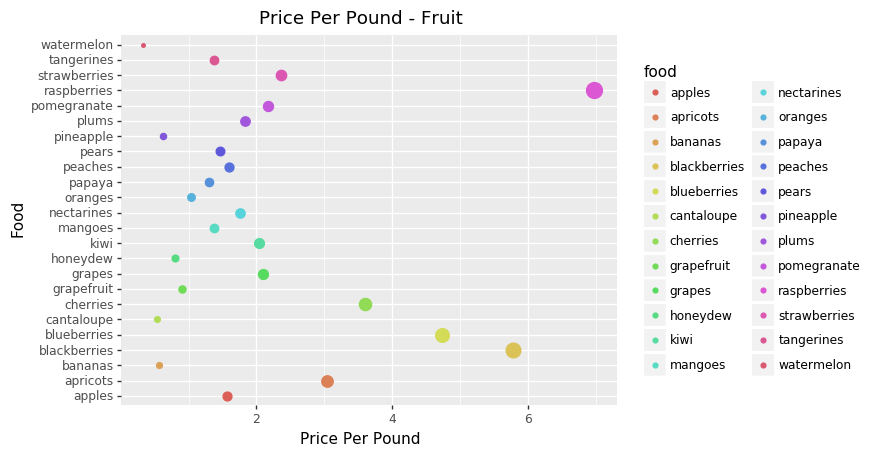

<ggplot: (7546572278)>


In [33]:
# dot plot using plotnine to assess the most/least espensive fruits
fruit_dot1 = gg.ggplot(fruit_df, 
                       gg.aes("price_per_lb","food", 
                              size = "price_per_lb", 
                              color = "food"))

fruit_dot2 = fruit_dot1 + gg.geom_point(show_legend = {"size" : False}) 
fruit_dot3 = fruit_dot2 + gg.labs(x = "Price Per Pound", y = "Food", title = "Price Per Pound - Fruit")

print(fruit_dot3)

The fruits that are the most expensive per pound are raspberries at \$6.975811 per pound, blackberries at \$5.774708 per pound, and blueberries at \$4.734622 per pound. Thus, for the fruit type the berries are the most expensive. The fruits that are the least expensive per pound are watermelon at \$0.333412 per pound, cantaloupe at \$0.535874 per pound, and bananas at \$0.566983 per pound.

Question 2: How do the price distributions compare for fruit and vegetables?

Text(0.5,0.98,'')

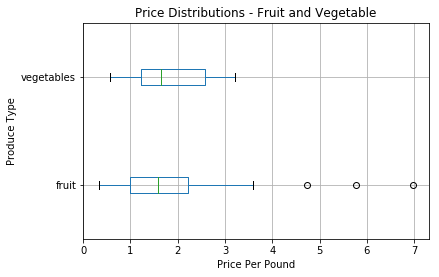

In [34]:
# boxplot using plotnine to compare the distributions of fruit and vegetables
fv_bxp1 = fv_df.boxplot(by ="type", column = "price_per_lb", vert = False)
fv_bxp1.set(title = "Price Distributions - Fruit and Vegetable", xlabel = "Price Per Pound", ylabel = "Produce Type")
fv_bxp1.get_figure().suptitle("")



In [36]:
veg_avg_ppp = veg_df["price_per_lb"].median() # median price per pound for vegetables
fruit_avg_ppp = fruit_df["price_per_lb"].median() # median price per pound for fruit

rows = ["Vegetable", "Fruit"] # define rows
columns = ["Average Price Per Pound"] # define columns

median_df = np.array([[veg_avg_ppp],[fruit_avg_ppp]]) # construct array for fruits and vegetables
fv_median_df = pandas.DataFrame(median_df, index = rows, columns = columns) # construct dataframe for fruits and vegetables
print(fv_median_df)

           Average Price Per Pound
Vegetable                 1.639477
Fruit                     1.579351


The price distributions for fruit and vegetables are slightly different but mostly similar. By taking the median price I was able to decrease the effect of the three outliers within the fruit category and found that the median price of vegetables \$1.64 is slightly higher than that of fruit \$1.58. Fruit contains three outliers which are in the berries category of raspberries, blackberries, and blueberries. Vegetables on the other hand contain no outliers and has a price per pound range that is narrower than their fruit couterpart. Possibily due to the outliers within the fruit produce type, it has a wider range of prices. Therefore I would expect the variance in fruit prices to be greater than that of vegetables. This can be seen in the above boxplot. 

Question 3: Which foods are the best value for the price?

In [43]:

fruit_df["standardized_value"] = 1 / fruit_df["price_per_lb"] / fruit_df["yield"] # standardized value for fruit

veg_df["standardized_value"] = 1 / veg_df["price_per_lb"] / veg_df["yield"] # standardized value for vegetables

fv_df["standardized_value"] = 1 / fv_df["price_per_lb"] / fv_df["yield"] # standardized value for both


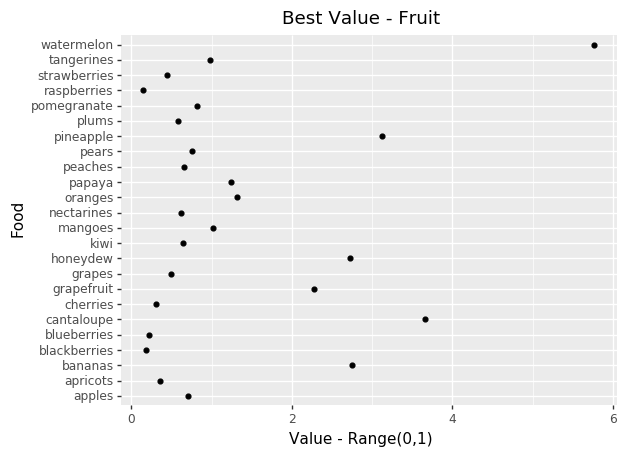

<ggplot: (-9223372029308622925)>

In [44]:
# dot plot using plotnine to assess the value of individual fruits
value_fruit1 = gg.ggplot(fruit_df, gg.aes("standardized_value","food"))
value_fruit2 = value_fruit1 + gg.geom_point(show_legend = {"size" : False}) 
value_fruit3 = value_fruit2 + gg.labs(x = "Value - Range(0,1)", 
                                      y = "Food", 
                                      title = "Best Value - Fruit")
value_fruit3

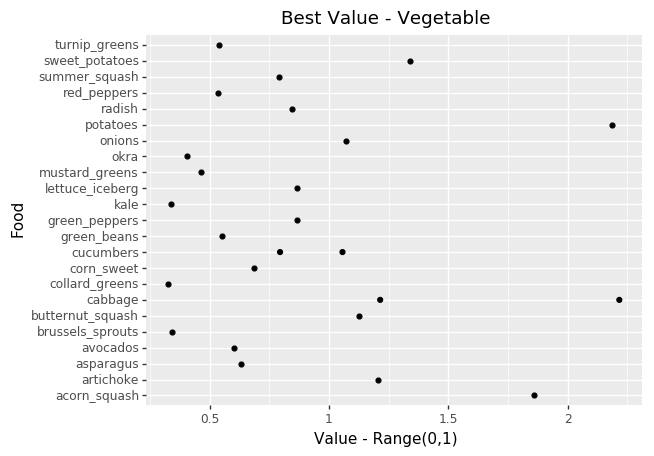

<ggplot: (7546142542)>

In [45]:
# dot plot using plotnine to assess the value of individual vegetables
value_veg1 = gg.ggplot(veg_df, gg.aes("standardized_value","food"))
value_veg2 = value_veg1 + gg.geom_point(show_legend = {"size" : False}) 
value_veg3 = value_veg2 + gg.labs(x = "Value - Range(0,1)", 
                                      y = "Food", 
                                      title = "Best Value - Vegetable")
value_veg3

The fruit with the best value for its price is is watermelon and the vegetables with the best value for it price is the potatoes and cabbage. In order to determine the best value for the price for both fruit and vegetables I calculated an adjusted priced factoring in price per pound and yield. This allowed me to determine the fruits and vegetables that have the greatest value in the yield expeceted per the retail price listed. The fruits and vegetables make sense because they are relatively cheap compared to others with a higher yield. Something to make note of is that the yield factor is already presented in the pounds per cup and price per cup variables. 

Question 4: What's something surprising about this data set?

Something that surprised me about this data set was that the price per pound for a produce item is reflected on that items yield. Items such as berries have a very high yield and are more costly to the consumer, this can be associated with the increased beneft received from consuming a product with greater inherent value. Also, I was suprised that vegetables were on average more expensive than fruits, which I assume have a greater demand than the less popular vegetables. This can be due to the greater yield among vegetable products providing the consumer with more value and therefore greater costs to consume. 

Question 5: Which foods do you expect to provide the best combination of price, yield, and nutrition? A future assignment may combine this data set with another so you can check your hypothesis.

Fruits that I suspect have the best combination of price, yield, and nutrition are going to be watermelon, pineapple, honeydew, cantaloupe, and bananas. Vegetables that I suspect have the best combination of price, yield, and nutrition are going to be sweet potatoes, potatoes, cabbage, and acorn squash. Each of these have a high score on value and once I include the nutritional value for each I will be able to test my hypothesis and determine which have the best combination. Items that contain more nutrients per pound will have the greatest nutritional bioavailability, providing more value to the consumer. I look forward to conducting this analysis and presume a 2 variable based scatter plot to analyze the relationship between items nutrional value and standardized value based score will provide good insight into understanding this relationship. 